# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Этапы работы:
изучить данные, обучить модель для каждого региона, написать функцию расчета прибыли, посчитать прибыль и риски.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [2]:
try:
    data_1 = pd.read_csv('C:/Users/user/Downloads/geo_data_0.csv')
    data_2 = pd.read_csv('C:/Users/user/Downloads/geo_data_1.csv')
    data_3 = pd.read_csv('C:/Users/user/Downloads/geo_data_2.csv')
except:
    data_1 = pd.read_csv('/datasets/geo_data_0.csv')
    data_2 = pd.read_csv('/datasets/geo_data_1.csv')
    data_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
print(data_1.info(), data_1.isna().sum())
print(data_2.info(), data_2.isna().sum())
print(data_3.info(), data_3.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None id         0
f0         0
f1         0
f2   

In [4]:
print(data_1.duplicated().sum())
print(data_2.duplicated().sum())
print(data_3.duplicated().sum())

0
0
0


Пропусков нет. Дубликатов тоже. Есть ненужный столбец - id. Посмотрим на распределение признаков.

In [5]:
data_1 = data_1.drop(['id'],axis=1)
data_2 = data_2.drop(['id'],axis=1)
data_3 = data_3.drop(['id'],axis=1)

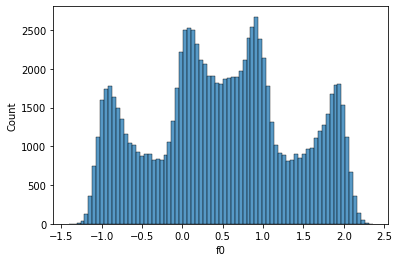

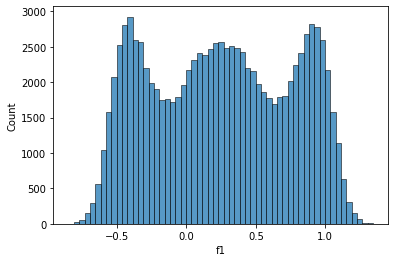

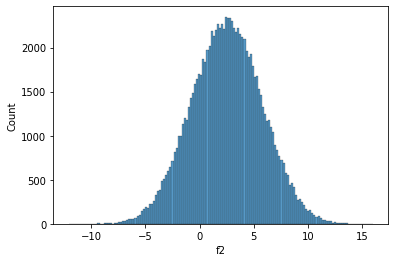

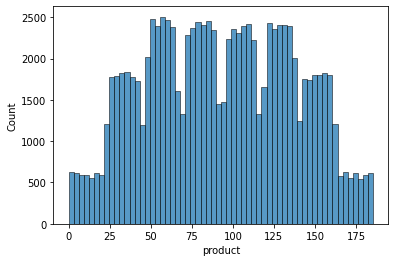

In [6]:
sns.histplot(data_1['f0'])
plt.show()
sns.histplot(data_1['f1'])
plt.show()
sns.histplot(data_1['f2'])
plt.show()
sns.histplot(data_1['product'])
plt.show()

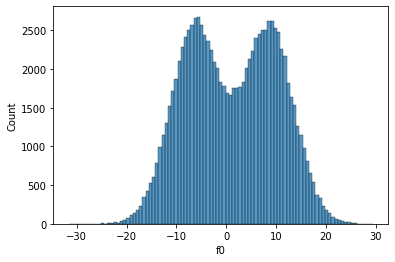

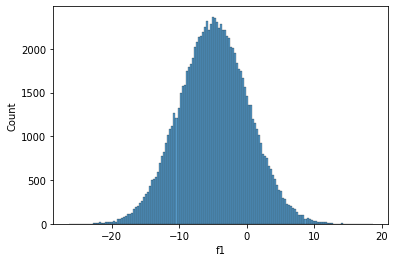

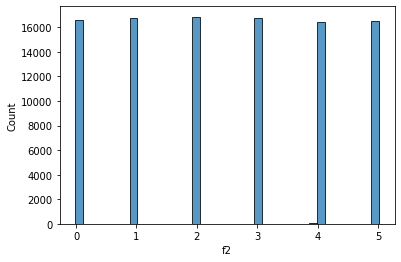

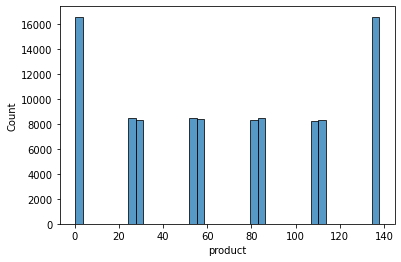

In [7]:
sns.histplot(data_2['f0'])
plt.show()
sns.histplot(data_2['f1'])
plt.show()
sns.histplot(data_2['f2'])
plt.show()
sns.histplot(data_2['product'])
plt.show()

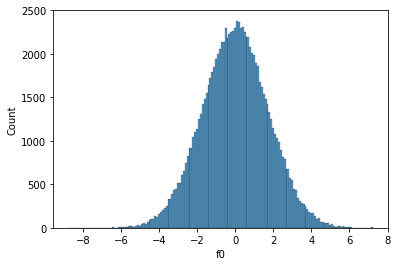

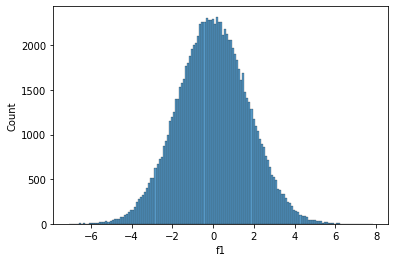

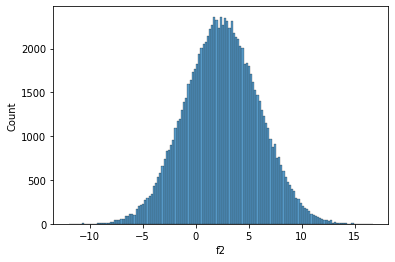

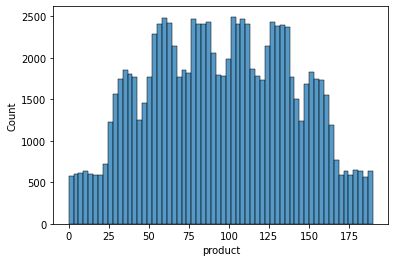

In [8]:
sns.histplot(data_3['f0'])
plt.show()
sns.histplot(data_3['f1'])
plt.show()
sns.histplot(data_3['f2'])
plt.show()
sns.histplot(data_3['product'])
plt.show()

Распределение многих признаков отличается от нормального. Маштабы признаков несильно отличаются. Пока оставим признаки как есть.

Вывод: данные загружены и проверенны: дубликатов, пропусков нет, типы данных соотвутствуют. Распределение некоторых признаков отличается от нормального.

## Обучение и проверка модели

Разделим данные на выборки и обучим модели.

In [9]:
def test_split(data, target):
    features = data.drop([target] , axis=1)
    target = data[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(data_1,'product')
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(data_2,'product')
features_train_3, features_valid_3, target_train_3, target_valid_3 = test_split(data_3,'product')
print('Размер тренериующей выборки', features_train_1.shape[0])
print('Размер валидационной выборки', features_valid_1.shape[0])

Размер тренериующей выборки 75000
Размер валидационной выборки 25000


In [10]:
model = LinearRegression()
model.fit(features_train_1, target_train_1)
predict_1 = model.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, predict_1)**0.5
predict_mean = predict_1.mean()
print('rmse',rmse_1,'средний запас предсказанного сырья',predict_mean)


rmse 37.5794217150813 средний запас предсказанного сырья 92.59256778438035


In [11]:
model = LinearRegression()
model.fit(features_train_2, target_train_2)
predict_2 = model.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, predict_2)**0.5
predict_mean = predict_2.mean()
print('rmse',rmse_2,'средний запас предсказанного сырья',predict_mean)

rmse 0.893099286775617 средний запас предсказанного сырья 68.728546895446


In [12]:
model = LinearRegression()
model.fit(features_train_3, target_train_3)
predict_3 = model.predict(features_valid_3)
rmse_3 = mean_squared_error(target_valid_3, predict_3)**0.5
predict_mean = predict_3.mean()
print('rmse',rmse_3,'средний запас предсказанного сырья',predict_mean)

rmse 40.02970873393434 средний запас предсказанного сырья 94.96504596800489


Вывод: Лучше всего модель предсказала количество запасов во втором регионе (rmse- 0.89), но среднего количество сырья там меньше чем в 1 и 3 регионе

## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей. 

In [13]:
budget = 10000000
places = 500
best_places = 200
unit_price = 450

In [14]:
min_v = budget / (best_places * unit_price)
print(min_v)

111.11111111111111


Для первого и третьего региона- высокая вероятность окупить затраты. Разброс значений вокруг среднего 92.5 и 95 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего.

Во втором регионе тоже может быть достаточно скважин со значением выше 111. Хотя среднее значения 68.7.

## Расчёт прибыли и рисков 

Подготовим данные для работы функции.

In [15]:
predict_1 = pd.Series(predict_1)
predict_2 = pd.Series(predict_2)
predict_3 = pd.Series(predict_3)

In [16]:
target_valid_1 = pd.Series(target_valid_1).reset_index(drop=True)
target_valid_2 = pd.Series(target_valid_2).reset_index(drop=True)
target_valid_3 = pd.Series(target_valid_3).reset_index(drop=True)

In [17]:
def revenue(target, prob, count):
    probs_sorted = prob.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    v = selected.sum()
    return v * unit_price - budget

Это функция для расчета прибыли скважин с максимальными значениями предсказаний.

Далее -Посчитаем риски и прибыль для каждого региона

In [18]:
state = np.random.RandomState(12345)

def boots(target, probs):
    values = []
    for i in range(1000):
        target_sample = target.sample(n=places,random_state=state,replace=True)
        probs_sample = probs[target_sample.index]
        values.append(revenue(target,probs_sample,best_places))
        
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = (values < 0).sum() / 1000
    
    return values.sum(), lower, upper, risk

In [19]:
average_1, lower_1, upper_1, risk_1 = boots(target_valid_1, predict_1)
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Средняя прибыль по региону = 396164984.80 тыс.руб.
95% доверительный интервал от -111215.55 до 909766.94 тыс.руб.
Процент риска 6.90%


In [20]:
average_2, lower_2, upper_2, risk_2 = boots(target_valid_2, predict_2)
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Средняя прибыль по региону = 461155817.28 тыс.руб.
95% доверительный интервал от 78050.81 до 862952.06 тыс.руб.
Процент риска 0.70%


In [21]:
average_3, lower_3, upper_3, risk_3 = boots(target_valid_3, predict_3)
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_3))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_3, upper_3))
print('Процент риска {:.2%}'.format(risk_3))

Средняя прибыль по региону = 392950475.17 тыс.руб.
95% доверительный интервал от -112227.63 до 934562.91 тыс.руб.
Процент риска 6.50%


Вывод: Первый и третий регион имеют достаточно высокий процент риска. Наилучший вариант - 2 регион. В нем средняя прибыль выше всего, процент риска 0.7, а доверительный интервал показывает, что даже при самом неудачном стечении обстоятельств - проект окупится.